In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [5]:
file_path = r"C:\Users\kolki\Downloads\gld_price_data.csv"
gold_data = pd.read_csv(file_path)

In [6]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [9]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [31]:
gold_data = pd.read_csv(file_path)
gold_data = gold_data.drop('Date',axis=1)

correlation = gold_data.corr()

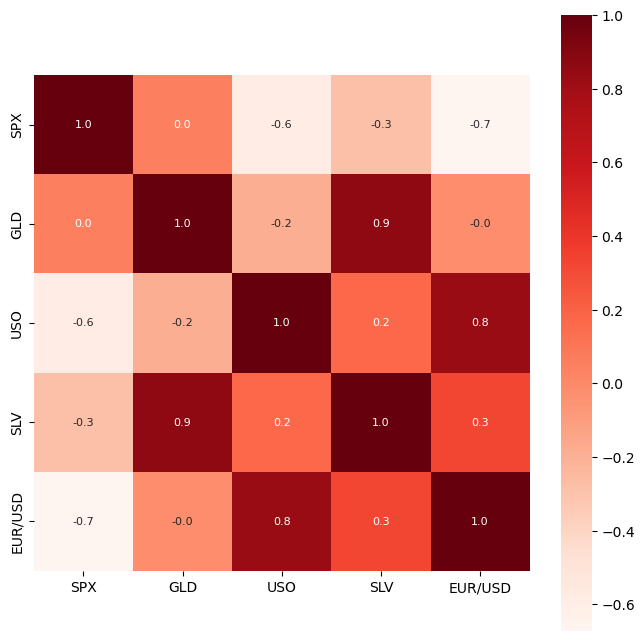

In [32]:
correlation = gold_data.corr()

# Plot heatmap
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',
            annot=True, annot_kws={'size':8}, cmap='Reds')
plt.show()

In [33]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


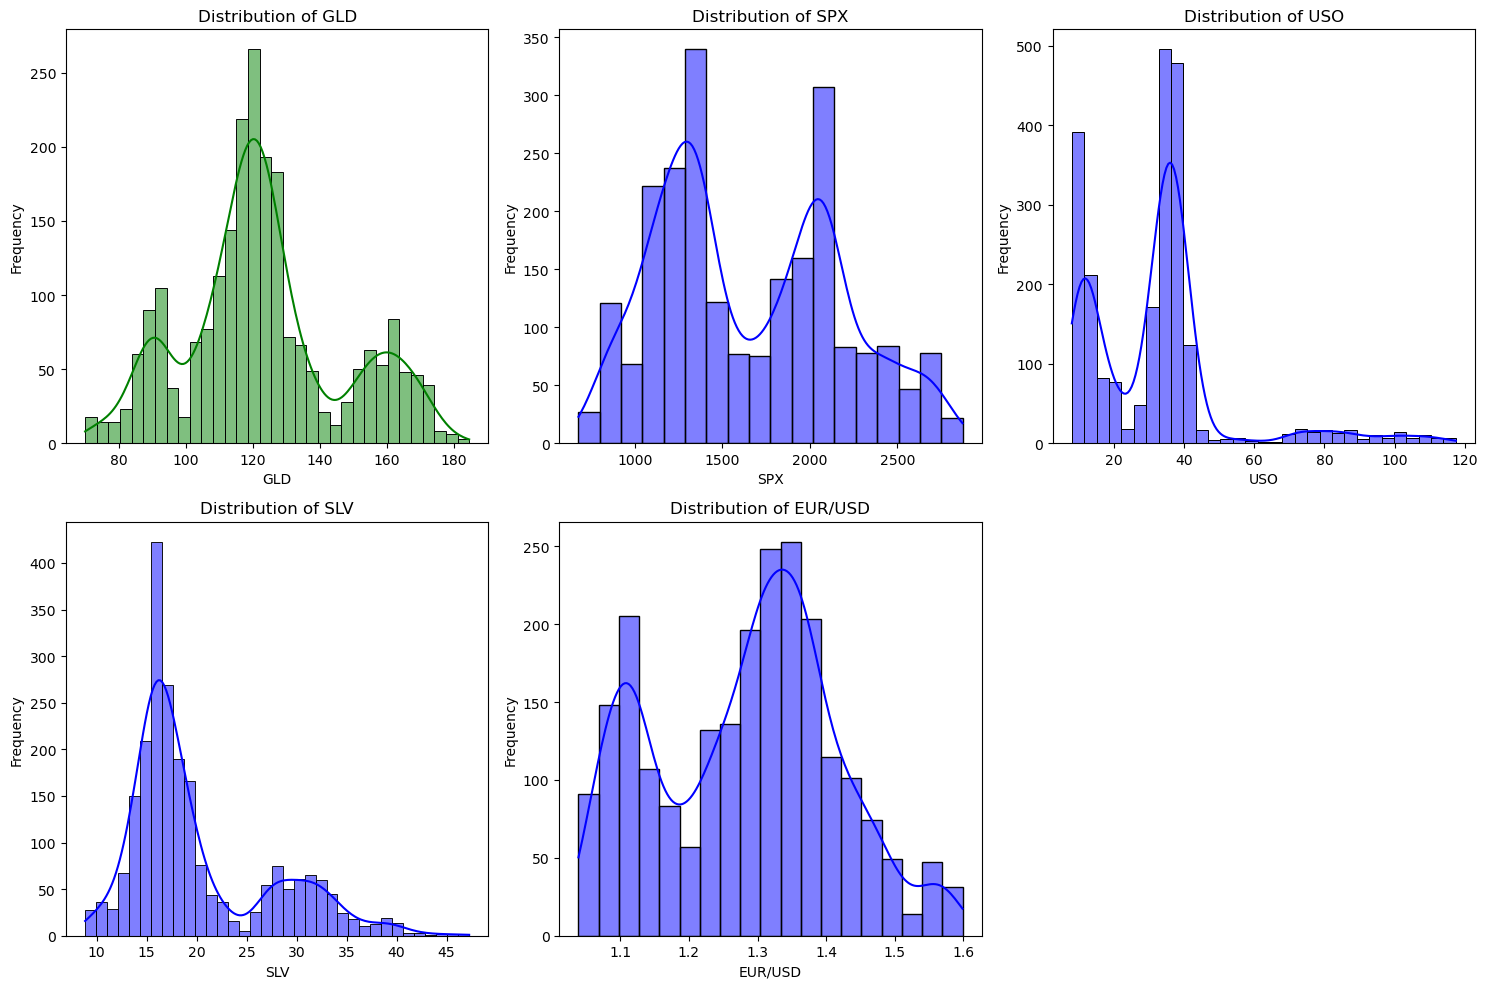

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

file_path = r"C:\Users\kolki\Downloads\gld_price_data.csv"
gold_data = pd.read_csv(file_path)
# Set up the figure
plt.figure(figsize=(15, 10))

# List of numerical columns you want to visualize (modify as needed)
numerical_features = ['GLD', 'SPX', 'USO', 'SLV', 'EUR/USD']  # Add/remove columns as needed

# Create subplots for each feature
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)  # Adjust grid size (rows, cols) based on number of features
    sns.histplot(gold_data[feature], kde=True, color='green' if feature == 'GLD' else 'blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
they seem normaly distributed except USO 

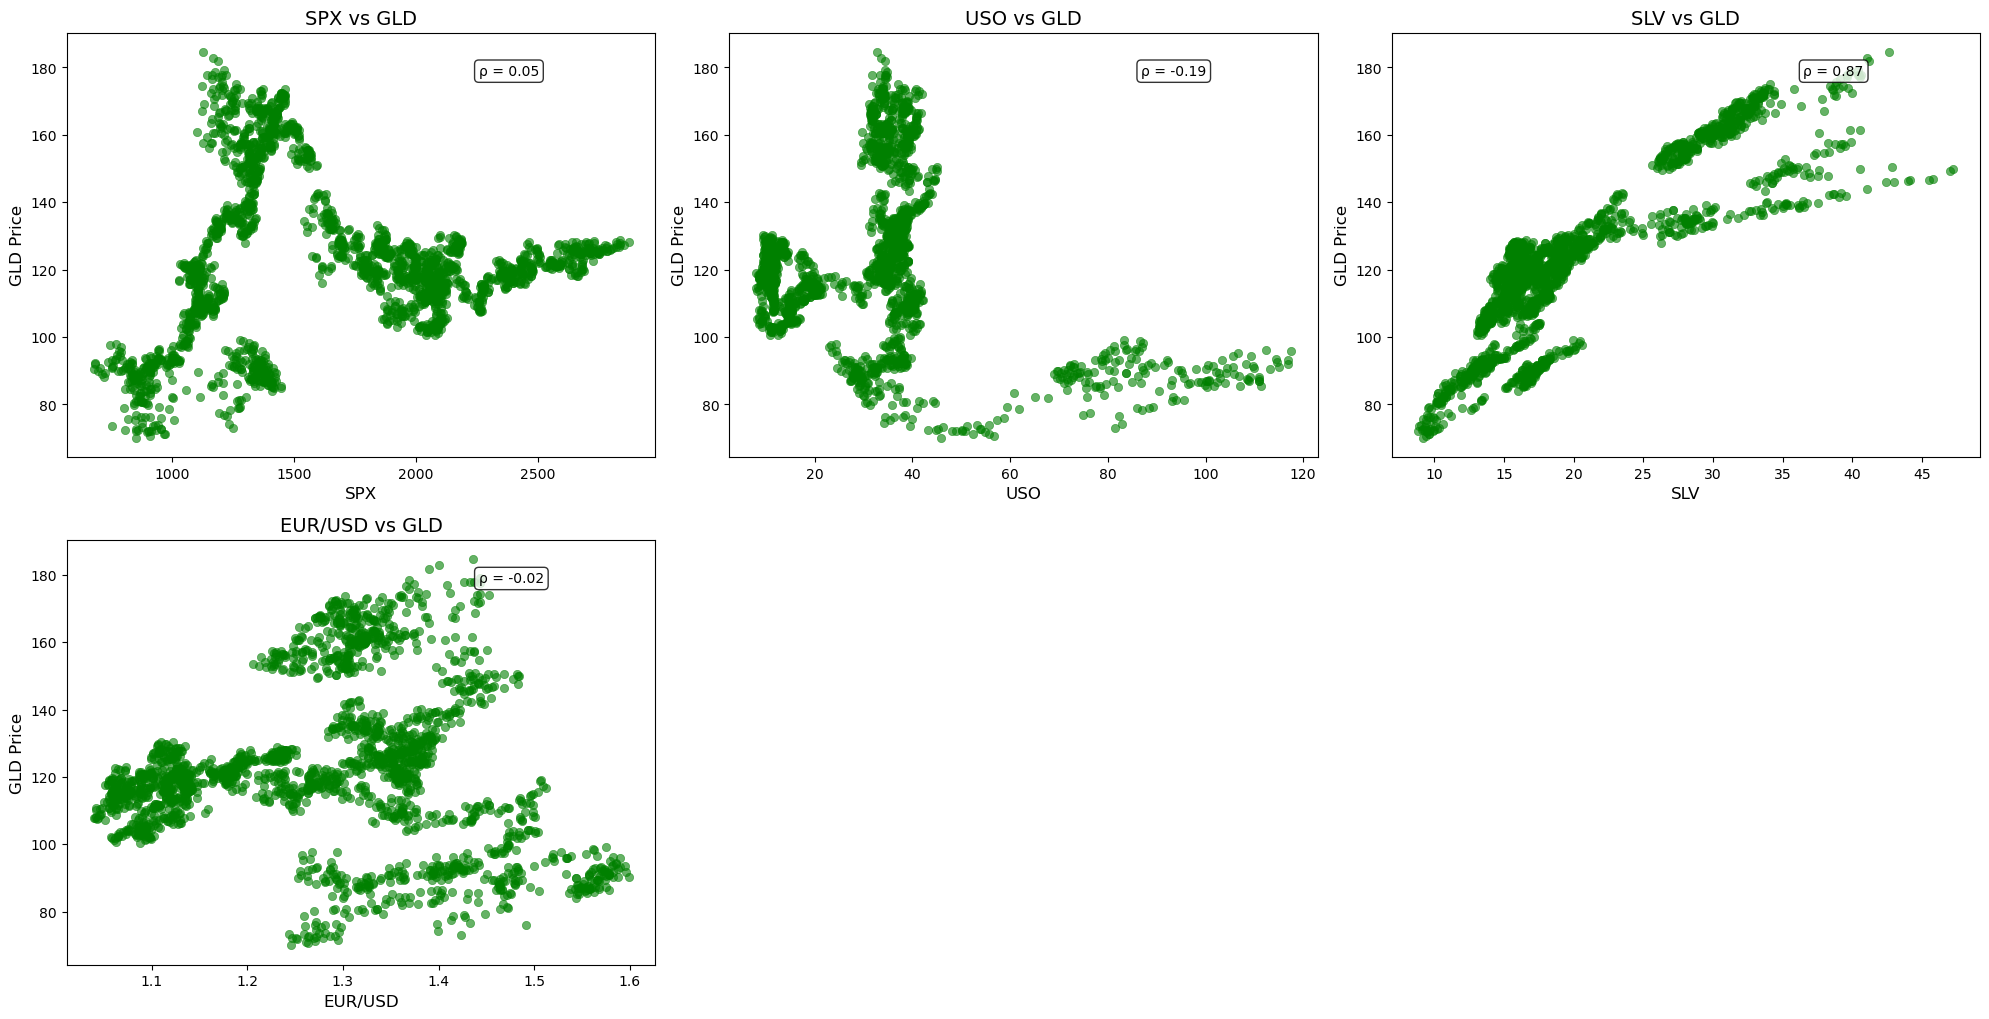

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. First identify all numerical features (excluding GLD itself)
numerical_features = gold_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_features = [f for f in numerical_features if f != 'GLD']  # Exclude target variable

# 2. Set up the plot
plt.figure(figsize=(20, 5*len(numerical_features)), facecolor='white')  # Dynamic height
plotnumber = 1

# 3. Create scatter plots for each numerical feature
for feature in numerical_features:
    ax = plt.subplot(len(numerical_features), 3, plotnumber)
    sns.scatterplot(x=gold_data[feature], y=gold_data['GLD'], 
                   color='green', alpha=0.6, edgecolor=None)
    
    # Add correlation coefficient as annotation
    corr = gold_data[feature].corr(gold_data['GLD'])
    ax.annotate(f'ρ = {corr:.2f}', xy=(0.7, 0.9), xycoords='axes fraction',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('GLD Price', fontsize=12)
    plt.title(f'{feature} vs GLD', fontsize=14)
    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
it seems SLV feature linearly progressing with GLD

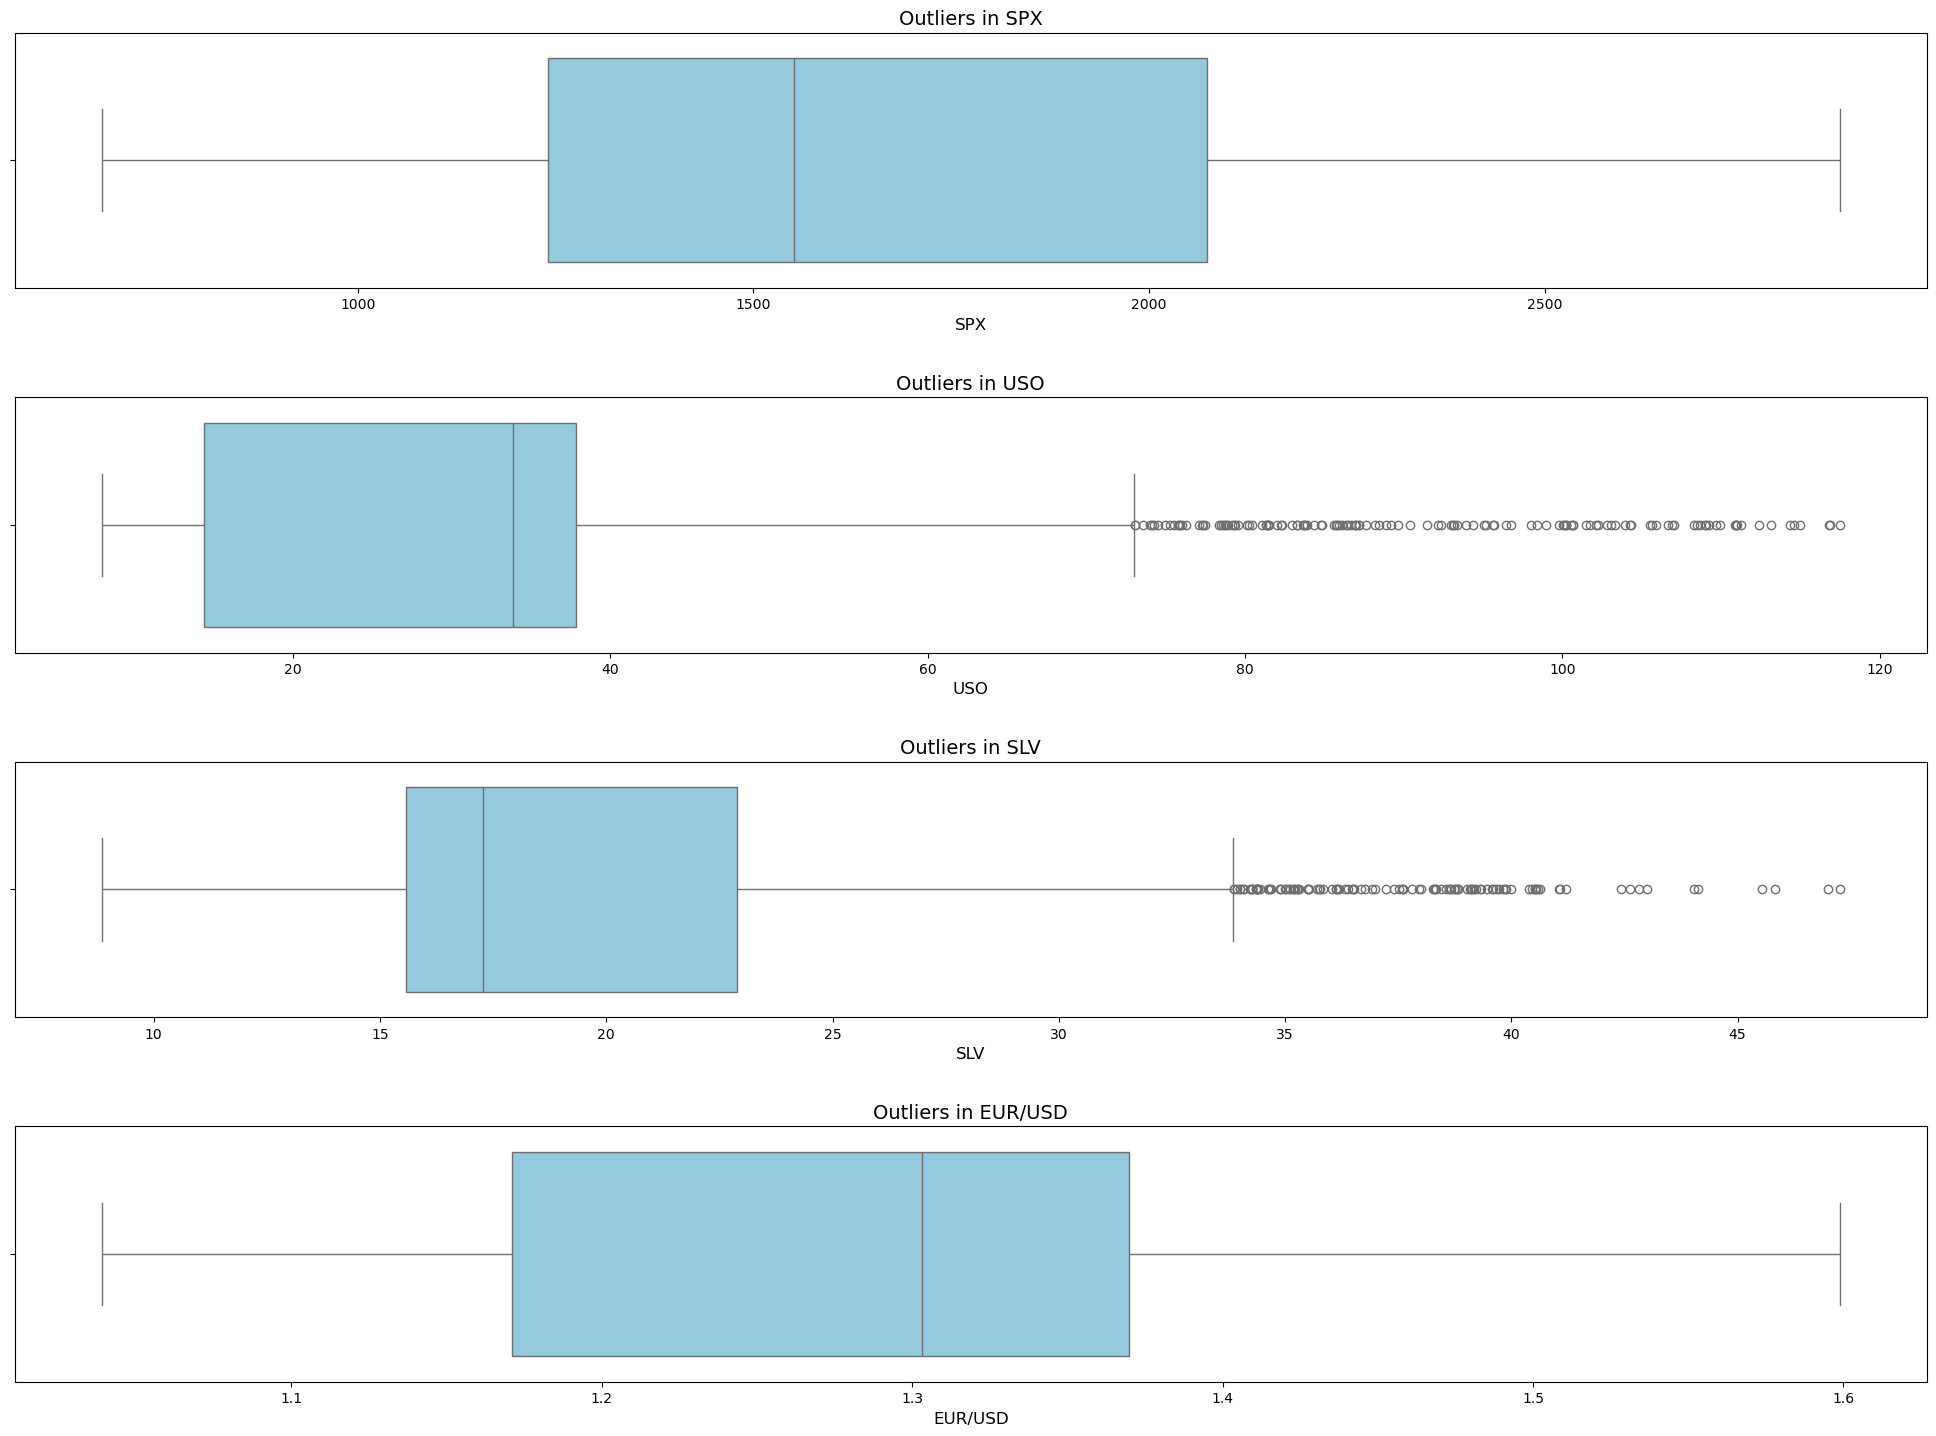

In [9]:
# Boxplot visualization for all numerical features to detect outliers
plt.figure(figsize=(20, 15), facecolor='white')  # Fixed typo in facecolor, adjusted size
plotnumber = 1  # Start from 1 instead of 0 for subplot numbering

for numerical_feature in numerical_features:
    plt.subplot(len(numerical_features), 1, plotnumber)  # Dynamic rows based on feature count
    sns.boxplot(x=gold_data[numerical_feature], color='skyblue')  # Using gold_data instead of df
    plt.xlabel(numerical_feature, fontsize=12)
    plt.title(f'Outliers in {numerical_feature}', fontsize=14)
    plotnumber += 1

plt.tight_layout(pad=3.0)  # Added padding for better spacing
plt.show()

it seems USO and SLV has outliers
but we ignore the outliers by the asssuming The jump/drop was due to a real-world event (e.g., financial crisis, war, inflation)
and there is no need to drop another column(all they are needed)

In [11]:
X = gold_data.drop(['GLD'],axis=1)
Y = gold_data['GLD']

In [37]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [38]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [18]:
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. Prepare data
X = gold_data.drop(['GLD'], axis=1)  # Features
Y = gold_data['GLD']                 # Target

# 2. Split data (20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [19]:
len(X_train)

1832

In [20]:
X_train

,Date,SPX,USO,SLV,EUR/USD
476,3/8/2010,1138.500000,39.790001,16.889999,1.361693
1958,11/22/2016,2202.939941,10.630000,15.800000,1.063886
248,3/2/2009,700.820007,24.480000,12.770000,1.256408
2231,2/12/2018,2656.000000,11.890000,15.570000,1.225280
1325,1/14/2014,1838.880005,33.040001,19.420000,1.366998
...,...,...,...,...,...
1071,11/23/2012,1409.150024,32.320000,32.980000,1.287515
433,1/4/2010,1132.989990,40.270000,17.230000,1.442398
674,1/31/2011,1286.119995,38.610001,27.389999,1.357276
1099,1/7/2013,1461.890015,33.919998,29.180000,1.306745


In [31]:
import xgboost as xgb
print(xgb.__version__)

3.0.1


In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [14]:
file_path = r"C:\Users\kolki\Downloads\gld_price_data.csv"
gold_data = pd.read_csv(file_path)
# 1. Prepare data
X = gold_data.drop(['GLD','Date'], axis=1)  # Features
Y = gold_data['GLD']                 # Target
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}
from sklearn.model_selection import train_test_split
import pandas as pd



# 2. Split data (20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [15]:
print(X_train.dtypes)

SPX        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object


In [17]:
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(Y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_test, y_pred)
    r2 = r2_score(Y_test, y_pred)
    
    # Store results
    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }
    
    print(f"{name} Evaluation:")
    print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")
    print("-"*50)

Decision Tree Evaluation:
MSE: 8.4921, RMSE: 2.9141, MAE: 1.3809, R2: 0.9839
--------------------------------------------------
Random Forest Evaluation:
MSE: 5.9588, RMSE: 2.4411, MAE: 1.3536, R2: 0.9887
--------------------------------------------------
XGBoost Evaluation:
MSE: 6.6537, RMSE: 2.5795, MAE: 1.4647, R2: 0.9874
--------------------------------------------------


In [ ]:
SO RANDOM FOREST CHOOSEN BECAUSE OF ITS HIGH R^2

In [19]:
# Convert results to DataFrame for better visualization
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)

                    MSE      RMSE       MAE        R2
Decision Tree  8.492060  2.914114  1.380860  0.983900
Random Forest  5.958799  2.441065  1.353626  0.988702
XGBoost        6.653740  2.579485  1.464731  0.987385


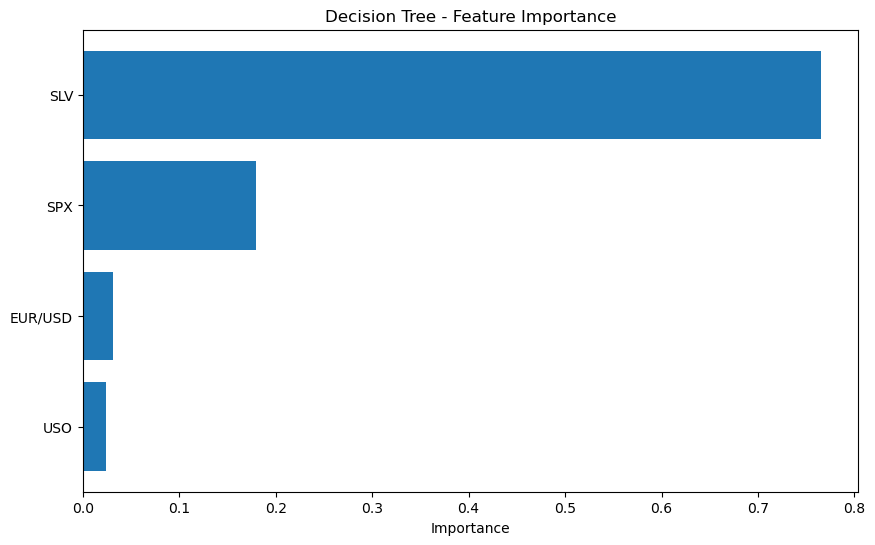

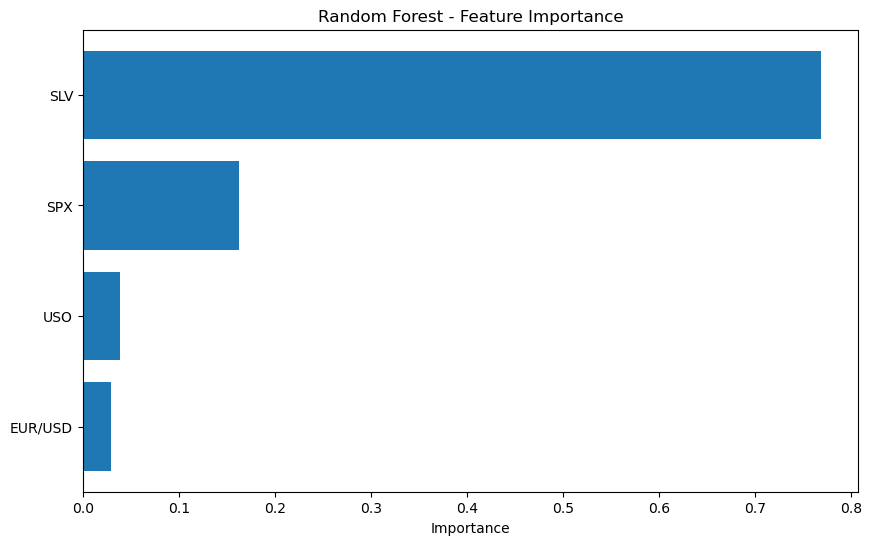

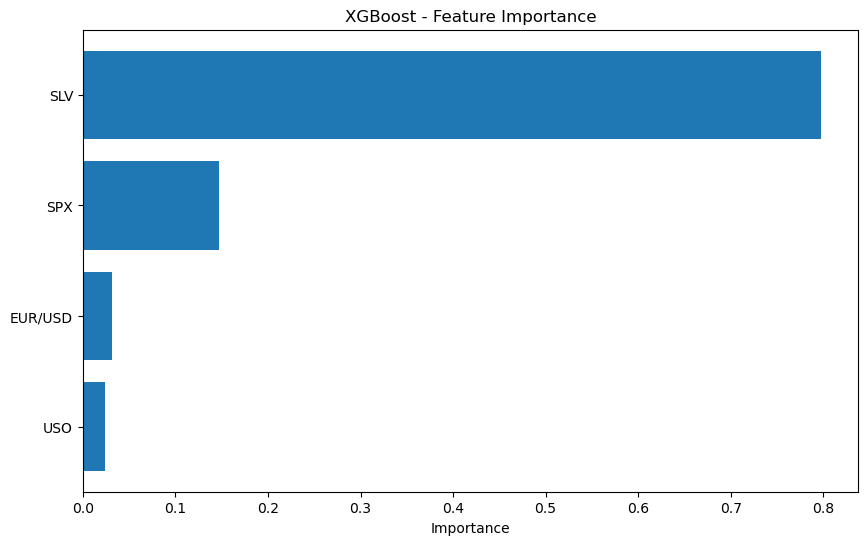

In [20]:
import matplotlib.pyplot as plt

for name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        # Get feature importances
        importances = model.feature_importances_
        features = X_train.columns
        
        # Create DataFrame
        feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
        feature_importance = feature_importance.sort_values('Importance', ascending=False)
        
        # Plot
        plt.figure(figsize=(10, 6))
        plt.title(f"{name} - Feature Importance")
        plt.barh(feature_importance['Feature'], feature_importance['Importance'])
        plt.xlabel('Importance')
        plt.gca().invert_yaxis()
        plt.show()

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the model
rf_model = RandomForestRegressor(
    n_estimators=100,  # Number of trees
    random_state=42,   # Ensures reproducibility
    max_depth=None,    # Let trees grow fully (can tune later)
    min_samples_split=2,
    n_jobs=-1         # Uses all CPU cores for faster training
)

# Train the model
rf_model.fit(X_train, Y_train)

# Make predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [25]:
# Training set performance
train_mae = mean_absolute_error(Y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(Y_train, y_train_pred))
train_r2 = r2_score(Y_train, y_train_pred)

# Test set performance
test_mae = mean_absolute_error(Y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(Y_test, y_test_pred))
test_r2 = r2_score(Y_test, y_test_pred)

# Display results
results = {
    "Metric": ["MAE", "RMSE", "R²"],
    "Train": [train_mae, train_rmse, train_r2],
    "Test": [test_mae, test_rmse, test_r2]
}

results_df = pd.DataFrame(results)
print(results_df)

  Metric     Train      Test
0    MAE  0.480386  1.353626
1   RMSE  0.896166  2.441065
2     R²  0.998528  0.988702
